In [34]:
import numpy as np
import matplotlib.pyplot as plt

import scienceplots
plt.style.use('science')
plt.style.use(['no-latex'])

savepath = "results/P2Q2/"

\begin{equation}
    \mathbf{W}=\left[\begin{array}{cc}
    w_{\text {self}} & w_{\text {other}} \\
    w_{\text {other}} & w_{\text {self}}
    \end{array}\right], \quad \mathbf{r}=\left[\begin{array}{c}
    r_1 \\
    r_2
    \end{array}\right], \mathbf{I}=\left[\begin{array}{c}
    I_1 \\
    I_2
    \end{array}\right].
\end{equation}

\begin{equation}
\begin{aligned}
    \tau \dfrac{dr_1}{dt} &= -r_1 + w_{\text{self}}r_1 + w_{\text{other}}r_2 + I_1, \\
    \tau \dfrac{dr_2}{dt} &= -r_2 + w_{\text{other}}r_1 + w_{\text{self}}r_2 + I_2, \\
\end{aligned}
\end{equation}

\begin{equation}
    \tau \dfrac{d\mathbf{r}}{dt} = -\mathbf{r} + \mathbf{W}\mathbf{r} + \mathbf{I}. 
\end{equation}

\begin{equation}
    \boldsymbol{\xi}^{(1)}=\left[\begin{array}{l}
    1 \\
    1
    \end{array}\right], \quad \boldsymbol{\xi}^{(2)}=\left[\begin{array}{c}
    1 \\
    -1
    \end{array}\right].
\end{equation}

\begin{equation}
    \lambda_1 = w_{\text{self}} + w_{\text{other}}, \lambda_2 = w_{\text{self}} - w_{\text{other}}. 
\end{equation}

Write $\mathbf{I}$ in the eigenbasis: 
\begin{equation}
    \mathbf{I} = b_1 \xi^{(1)} + b_2 \xi^{(2)} = \left[\begin{array}{c}
    b_1 + b_2 \\
    b_1 - b_2
    \end{array}\right].
\end{equation}

Thus: 
\begin{equation}
    I_1 = b_1 + b_2, I_2 = b_1 - b_2, b_1 = \dfrac{I_1+I_2}{2} = I_{\text{common}}, b_2 = \dfrac{I_1 - I_2}{2} = I_{\text{diff}}. 
\end{equation}

Assume $w_{\text{self}} > 0, w_{\text{other}} < 0$, and $w_{\text{other}} > w_{\text{self}}$: 

1. Inputs common to both cells (along $\xi^{(1)}$): these see eigenvalue $\lambda_1 = w_{\text{self}} + w_{\text{other}} < 0$. The amplification factor is $(1-\lambda_1)^{-1} < 1$. 

2. Opposite inputs (along $\xi^{(2)}$), $\lambda_2 = w_{\text{self}} - w_{\text{other}} = w_{\text{self}} + |w_{\text{other}}| > 0$. If $\lambda_2 < 1$, amplication factor $(1-\lambda_2)^{-1} > 1$, indicating amplified and stable. If $\lambda_2 > 1$, the linear system has no stable fied point in this mode. 

3. $\lambda_1 = -0.5, \lambda_2 = 0.9$. 

4. $A_1 \approx 0.667$ (attenuation), $A_2 = 10$ (strong amplification). 

5. In the eigenbasis, the dynamics of each component is: 
\begin{equation}
\dot{z_i} = -\dfrac{1-\lambda_i}{\tau}(z_i - z_i^{\infty}),
\end{equation}
so: 
\begin{equation}
    \tau_{\text{eff,i}} = \dfrac{\tau}{1-\lambda_i}. 
\end{equation}
For $\tau=18ms$: 
\begin{equation}
    \tau_{\text{eff},1} = 12ms, \tau_{\text{eff},2} = 180ms. 
\end{equation}
Hence the amplified component (difference mode) changes more slowly. 


$I_1 = 63Hz, I_2 = 57Hz$, $w_{\text{self}}=0.2, w_{\text{other}}=-0.7$: 
1. Decompose the input: 
\begin{equation}
    b_1 = \dfrac{I_1+I_2}{2} = 60Hz (\text{common}), b_2 = \dfrac{I_1-I_2}{2}=3Hz (\text{difference}). 
\end{equation}
2. Steady state: 
\begin{equation}
    \mathbf{r}_{\infty} = \dfrac{b_1}{1-\lambda_1}\xi^{(1)} + \dfrac{b_2}{1-\lambda_2}\xi^{(2)} = \left[\begin{array}{c}
    70 \\
    10
    \end{array}\right]Hz.
\end{equation}

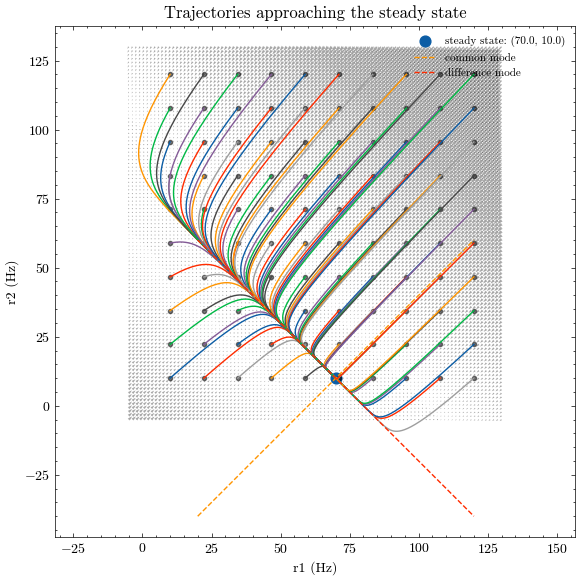

In [35]:
tau = 18e-3 # 18ms 
w_self, w_other = 0.2, -0.7
W = np.array([[w_self, w_other],[w_other, w_self]])
I = np.array([63.0, 57.0])
r_star = np.linalg.solve(np.eye(2) - W, I)

def f(r):
    return (-r + W @ r + I) / tau

def simulate(r0, dt=1e-4, T=1.2):
    nt = int(round(T/dt)) + 1
    tgrid = np.arange(nt)*dt
    traj = np.zeros((nt, 2))
    traj[0] = r0
    for k in range(nt - 1):
        traj[k+1] = traj[k] + dt * f(traj[k])
    return tgrid, traj

I_1_range = np.linspace(10, 120, 10)
I_2_range = np.linspace(10, 120, 10)
inits = np.array([[I_1, I_2] for I_1 in I_1_range for I_2 in I_2_range])

fig, ax = plt.subplots(1,1, figsize=(6,6))

x = np.linspace(-5, 130, 100)
y = np.linspace(-5, 130, 100)
X, Y = np.meshgrid(x, y)
U = (-X + w_self*X + w_other*Y + I[0]) / tau
V = (-Y + w_other*X + w_self*Y + I[1]) / tau
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=3000, alpha=0.35)

for r0 in inits:
    t, traj = simulate(r0, dt=1e-4, T=1.2)
    ax.plot(traj[0,0], traj[0,1], 'o', markersize=3, color='black', alpha=0.5)
    ax.plot(traj[:,0], traj[:,1], 
            # label=f"start ({r0[0]:.0f},{r0[1]:.0f})"
    )

ax.scatter([r_star[0]], [r_star[1]], s=60, marker='o', \
    label=f'steady state: ({r_star[0]:.1f}, {r_star[1]:.1f})')

L = 50
tline = np.linspace(-L, L, 2)
ax.plot(r_star[0] + tline, r_star[1] + tline, linestyle='--', label='common mode')
ax.plot(r_star[0] + tline, r_star[1] - tline, linestyle='--', label='difference mode')

ax.set_xlabel('r1 (Hz)')
ax.set_ylabel('r2 (Hz)')
ax.set_title('Trajectories approaching the steady state')
ax.axis('equal')
ax.legend(loc='upper right', fontsize=8)
fig.tight_layout()
fig.savefig(f"{savepath}trajectories.png", dpi=1000)

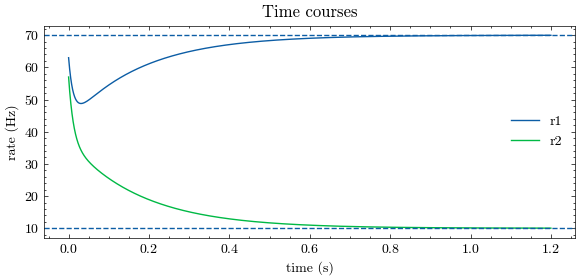

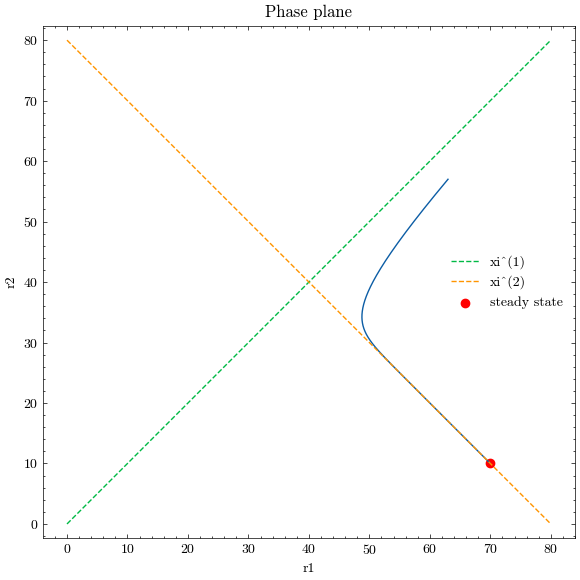

In [ ]:
dt = 1e-4
T = 1.2      
nt = int(T/dt)
r = np.zeros((nt,2))
r[0] = I                
for t in range(nt-1):
    dr = (-r[t] + W@r[t] + I)/tau
    r[t+1] = r[t] + dt*dr

r_inf = np.array([70.0, 10.0])

tgrid = np.arange(nt)*dt
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(tgrid, r[:,0], label='r1')
ax.plot(tgrid, r[:,1], label='r2')
ax.axhline(r_inf[0], ls='--')
ax.axhline(r_inf[1], ls='--')
ax.set_xlabel('time (s)')
ax.set_ylabel('rate (Hz)')
ax.legend()
ax.set_title('Time courses')
fig.tight_layout()
fig.savefig(f"{savepath}time_courses.png", dpi=1000)

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(r[:,0], r[:,1])
x = np.linspace(0, 80, 2)
ax.plot(x, x, '--', label='xi^(1)');          
ax.plot(x, -x + r_inf.sum(), '--', label='xi^(2)')  
ax.scatter(*r_inf, c='r', label='steady state')
ax.set_xlabel('r1')
ax.set_ylabel('r2')
ax.legend()
ax.axis('equal')
ax.set_title('Phase plane')
fig.tight_layout()
fig.savefig(f"{savepath}phase_plane.png", dpi=1000)

\begin{equation}
\begin{aligned}
    \tau \dot{r_i} &= -r_i + \left[w_{\text{self}}r_i + w_{\text{other}}r_j + I_i - ga_i + \sigma \eta_i(t)\right]_0^{r_{\max}}, \\
    \tau_a \dot{a_i} &= -a_i + r_i. 
\end{aligned}
\end{equation}

With $r_2=0$, 
\begin{equation}
    \tau \dot{r_1} = -r_1 + w_{\text{self}}r_1 + I_1, r_1^* = \dfrac{I_1}{1-w_{\text{self}}}.
\end{equation}
which requires $w_{\text{self}} < 1, I_1 > 0$. Also, its net drive must be nonpositive: 
\begin{equation}
    w_{\text{other}}r_1^* + I_2 \le 0
\end{equation}

\begin{equation}
|w_{\text{other}}|\dfrac{I_1}{1 - w_{\text{self}}} \ge I_2
\end{equation}

Symmetric for neuron 2. 

With the loser clamped at zero, the winner obeys: 
\begin{equation}
    \tau \dot{r_1} = -(1-w_{\text{self}})r_1 + I_1. 
\end{equation}
Hence the winner is stable only if $1 - w_{\text{self}} > 0$. 

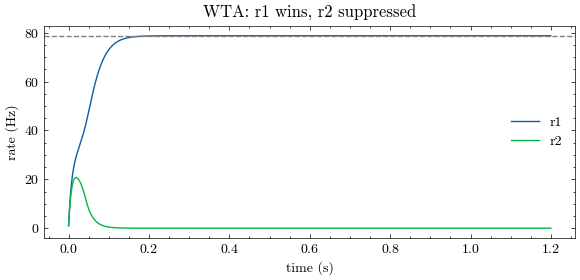

In [ ]:
def simulate(T=1.0, dt=1e-3, w_self=0.2, w_other=-1.4, I1=60.0, I2=60.0, 
             tau=20e-3, r_max=120.0, g=0.0, tau_a=1.0, sigma=0.0,
             r0=(0.0, 0.0), a0=(0.0, 0.0), seed=None):
    
    if seed is None:
        rng = np.random.default_rng()
    else:
        rng = np.random.default_rng(seed)
        
    nt = int(np.round(T/dt)) + 1
    t = np.arange(nt)*dt
    r1 = np.zeros(nt)
    r2 = np.zeros(nt)
    a1 = np.zeros(nt)
    a2 = np.zeros(nt)
    r1[0], r2[0] = r0
    a1[0], a2[0] = a0
    for k in range(nt-1):
        n1 = sigma * rng.standard_normal()
        n2 = sigma * rng.standard_normal()
        d1 = w_self*r1[k] + w_other*r2[k] + I1 - g*a1[k] + n1
        d2 = w_other*r1[k] + w_self*r2[k] + I2 - g*a2[k] + n2
        d1 = max(0.0, min(r_max, d1))
        d2 = max(0.0, min(r_max, d2))
        r1[k+1] = r1[k] + dt * (-r1[k] + d1) / tau
        r2[k+1] = r2[k] + dt * (-r2[k] + d2) / tau
        if g > 0.0:
            a1[k+1] = a1[k] + dt * (-a1[k] + r1[k]) / tau_a
            a2[k+1] = a2[k] + dt * (-a2[k] + r2[k]) / tau_a
        else:
            a1[k+1] = 0.0
            a2[k+1] = 0.0
    return t, r1, r2, a1, a2

# WTA
params_wta = dict(T=1.2, dt=1e-3, w_self=0.2, w_other=-1.4,
                  I1=63.0, I2=57.0, tau=18e-3, r_max=150.0,
                  g=0.0, tau_a=1.0, sigma=0.0,
                  r0=(1.0, 1.0))  
t, r1, r2, *_ = simulate(**params_wta)
upp = 63.0 / (1 - 0.2) # I1/(1 - w_self) = 63/(1-0.2) = 78.75

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(t, r1, label='r1')
ax.plot(t, r2, label='r2')
ax.axhline(upp, ls='--', color='gray')
ax.set_xlabel('time (s)')
ax.set_ylabel('rate (Hz)')
ax.set_title('WTA: r1 wins, r2 suppressed')
ax.legend()
fig.tight_layout()
fig.savefig(f"{savepath}wta_no_adaptation.png", dpi=1000)


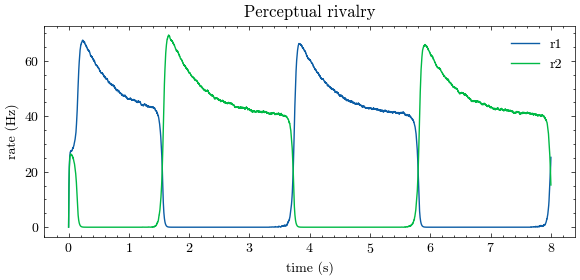

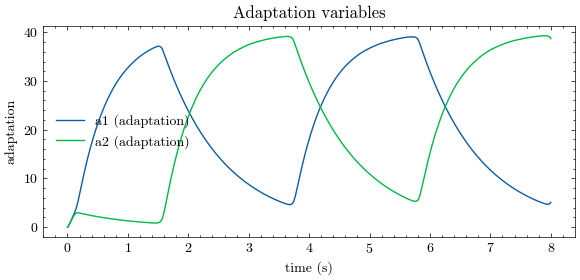

In [40]:
# Perceptual rivalry 
params_riv = dict(T=8.0, dt=1e-3, w_self=0.2, w_other=-1.4,
                  I1=60.0, I2=60.0, tau=18e-3, r_max=150.0,
                  g=0.7, tau_a=1.0, sigma=1.2,
                  r0=(0.1, 0.0), a0=(0.0, 0.0), seed=42)
t2, r1b, r2b, a1b, a2b = simulate(**params_riv)

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(t2, r1b, label='r1')
ax.plot(t2, r2b, label='r2')
ax.set_xlabel('time (s)')
ax.set_ylabel('rate (Hz)')
ax.set_title('Perceptual rivalry')
ax.legend()
fig.tight_layout()
fig.savefig(f"{savepath}perceptual_rivalry.png", dpi=1000)

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(t2, a1b, label='a1 (adaptation)')
ax.plot(t2, a2b, label='a2 (adaptation)')
ax.set_xlabel('time (s)')
ax.set_ylabel('adaptation')
ax.set_title('Adaptation variables')
ax.legend()
fig.tight_layout()
fig.savefig(f"{savepath}perceptual_rivalry_adaptation.png", dpi=1000)